# First Regression Data Cleaning

In [733]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

In [734]:
insurance = pd.read_csv("insurance_data.csv")

In [735]:
insurance

,YEAR,SERIAL,NHISHID,PERNUM,NHISPID,AGE,SEX,RACENEW,OCC,INCFAM97ON2,...,HINOFAMR,HINOAGER,HINOCOSTR,HINOREFUSER,HINOTHER,CNLUNG,CNLUNGAG,SMOKESTATUS2,Occupation_Category,SMK
0,2000,1,2000000001,1,20000000010101,28,1,100.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,Not in Universe,Other
1,2000,1,2000000001,2,20000000010102,35,2,100.0,25.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,20.0,Service Occupations,Yes
2,2000,1,2000000001,3,20000000010103,14,2,100.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,Not in Universe,Other
3,2000,1,2000000001,4,20000000010104,11,1,100.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,Not in Universe,Other
4,2000,1,2000000001,5,20000000010105,4,1,100.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,Not in Universe,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762654,2018,46495,2018055557,1,20180555570101,49,2,200.0,0.0,10.0,...,1.0,1.0,2.0,1.0,1.0,0.0,96.0,30.0,Not in Universe,No
1762655,2018,46498,2018055560,1,20180555600101,40,2,100.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,20.0,Computer and Mathematical Occupations,Yes
1762656,2018,46499,2018055562,1,20180555620101,61,2,100.0,30.0,32.0,...,0.0,0.0,0.0,0.0,0.0,1.0,96.0,30.0,Healthcare Practitioners and Technical Occupat...,No
1762657,2018,46499,2018055562,2,20180555620102,66,1,100.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,Not in Universe,Other


In [736]:
# Print column names
for column in insurance.columns:
    print(column)

YEAR
SERIAL
NHISHID
PERNUM
NHISPID
AGE
SEX
RACENEW
OCC
INCFAM97ON2
EARNIMP1
HINOTCOVE
HINOUNEMPR
HINOEMPR
HINOFAMR
HINOAGER
HINOCOSTR
HINOREFUSER
HINOTHER
CNLUNG
CNLUNGAG
SMOKESTATUS2
Occupation_Category
SMK


> Drop Unecessary Columns

>- Year - Year
>- SERIAL - Sequential Serial Number, Household Record
>- NHISHID - NHIS Unique identifier, household
>- PERNUM - Person number within family/household (from reformatting)
>- NHISPID - NHIS Unique Identifier, person
>- AGE - Age
>- SEX - Sex
>- RACENEW - Self-reported Race (Post-1997 OMB standards)
>- OCC - Detailed occupation
>- INCFAM97ON2- Total combined family income (1997+ w. 2007 categories)
>- EARNIMP1 - Person's imputed total earnings, previous calendar year
>- HINOTCOVE - Health Insurance coverage status
>- HINOUNEMPR - Reasons for no insurance: Unemployment
>- HINOEMPR - Reasons for no insurance: Employment-related reason
>- HINOFAMR - Reasons for no insurance: Family-related
>- HINOAGER - Reasons for no insurance: Aged out of family plan
>- HINOCOSTR - Reasons for no insurance: Too expensive
>- HINOREFUSER - Reasons for no insurance: Poor health/refused coverage
>- HINOTHER - Reasons for no insurance: Other
>- CNLUNG - Ever had cancer: Lung
>- CNLUNGAG - Age first diagnosed with lung cancer
>- SMOKESTATUS2 - Cigarette smoking recode 2: Current detailed/former/never
>- Occupation_Category
>- SMK - Smoking Status

In [737]:
# List of columns to drop
columns_to_drop = [
    "HINOUNEMPR",
    "HINOEMPR",
    "HINOFAMR",
    "HINOAGER",
    "HINOCOSTR",
    "HINOREFUSER",
    "HINOTHER",
    "SMOKESTATUS2",
    "SERIAL",
    "NHISHID",
    "PERNUM",
    "NHISPID",
    "AGE",
    "OCC",
]

# Drop specified columns
insurance = insurance.drop(columns=columns_to_drop)

In [738]:
# Print column names
for column in insurance.columns:
    print(column)

YEAR
SEX
RACENEW
INCFAM97ON2
EARNIMP1
HINOTCOVE
CNLUNG
CNLUNGAG
Occupation_Category
SMK


In [739]:
# Check data types of columns
column_data_types = insurance.dtypes

# Print the result
print("Data types of columns:")
print(column_data_types)

Data types of columns:
YEAR                     int64
SEX                      int64
RACENEW                float64
INCFAM97ON2            float64
EARNIMP1               float64
HINOTCOVE              float64
CNLUNG                 float64
CNLUNGAG               float64
Occupation_Category     object
SMK                     object
dtype: object


In [740]:
# Convert specified columns to categorical variables
columns_to_convert = [
    "SEX",
    "RACENEW",
    "INCFAM97ON2",
    "EARNIMP1",
    "HINOTCOVE",
    "CNLUNG",
    "CNLUNGAG",
    "Occupation_Category",
    "SMK",
]

insurance[columns_to_convert] = insurance[columns_to_convert].astype("category")

In [741]:
# Check data types of columns
column_data_types = insurance.dtypes

# Print the result
print("Data types of columns:")
print(column_data_types)

Data types of columns:
YEAR                      int64
SEX                    category
RACENEW                category
INCFAM97ON2            category
EARNIMP1               category
HINOTCOVE              category
CNLUNG                 category
CNLUNGAG               category
Occupation_Category    category
SMK                    category
dtype: object


In [742]:
insurance.describe()

,YEAR
count,1.762659e+06
mean,2.008967e+03
std,5.474669e+00
min,2.000000e+03
25%,2.004000e+03
50%,2.009000e+03
75%,2.014000e+03
max,2.018000e+03


In [743]:
# Print categories for each categorical variable
for column in columns_to_convert:
    print("Categories for column '{}':".format(column))
    print(insurance[column].cat.categories)
    print()

Categories for column 'SEX':
Index([1, 2], dtype='int64')

Categories for column 'RACENEW':
Index([100.0, 200.0, 300.0, 400.0, 520.0, 530.0, 541.0], dtype='float64')

Categories for column 'INCFAM97ON2':
Index([10.0, 20.0, 30.0, 31.0, 32.0, 96.0, 97.0, 98.0, 99.0], dtype='float64')

Categories for column 'EARNIMP1':
Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0, 10.0, 11.0, 12.0, 20.0, 21.0, 22.0,
       30.0, 31.0, 32.0, 40.0, 41.0, 42.0, 50.0, 51.0, 52.0, 60.0, 61.0, 62.0,
       63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
      dtype='float64')

Categories for column 'HINOTCOVE':
Index([1.0, 2.0, 9.0], dtype='float64')

Categories for column 'CNLUNG':
Index([0.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

Categories for column 'CNLUNGAG':
Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  9.0, 10.0, 12.0, 13.0, 14.0,
       15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0,
       28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
       40.0, 4

>- Sex - 1 Male, 2 Female
>- RaceNew - 100 White Only, 200 Black/African American only, 300 American Indian/Alaska Native only, 400 Asian only, 520 Other Race, 530 Race Group not Releasable, 541 Multiple Race (1999-2018: Including American Indian/Alaska Native)
>- INCFAM97ON2 - 10.0 $0 - $34,999,  20.0 $35,000-$74,999, 30.0 $75,000 and over, 31.0 $75,000-$99,999, 32.0 $100,000 and over, 96.0 $20,000 or more (no detail), 97.0 Refused, 98.0 Not ascertained or undefined, 99.0 Don't know
>- EARNIMP1 - 0.0 NIU (Unknown) 01 - 70 (refer to original documentation)
>- HINOTCOVE - 1.0 has coverage , 2.0 has no coverage, 9.0 Unknown-don't know
>- CNLUNG - 0.0 NIU, 1.0 Not mentioned, 2.0 Mentioned, 7.0 Unknown-refused, 9.0 Unknown-don't know
>- CNLUNGAG - 0 - 84 (refer to original documentation), 85 = 85+, 96 NIU, 97 Unkown - refused, 99 Unkown don't know
>- SMK - Yes, No, Others
>- Occupation 

## HINOTCOVE (Treatment)

In [744]:
# Count occurrences of each distinct value in the HINOTCOVE column
hinotcove_counts = insurance["HINOTCOVE"].value_counts()

# Calculate percentage proportion of each distinct value in the HINOTCOVE column
hinotcove_proportions = (insurance["HINOTCOVE"].value_counts() / len(insurance)) * 100

# Print the count and percentage proportion for each distinct value
print("Count and percentage proportion of each distinct value in 'HINOTCOVE':")
for value, count in hinotcove_counts.items():
    proportion = hinotcove_proportions[value]
    print("Value:", value)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct value in 'HINOTCOVE':
Value: 1.0
Count: 1482305
Percentage proportion: 84.09482492075892

Value: 2.0
Count: 263123
Percentage proportion: 14.927617877309224

Value: 9.0
Count: 17231
Percentage proportion: 0.9775572019318541



> Drop unknown

In [745]:
# Convert the "HINOTCOVE" column to a numeric type (float)
insurance["HINOTCOVE"] = pd.to_numeric(insurance["HINOTCOVE"], errors="coerce")

# Drop rows where the "HINOTCOVE" column contains the value 9.0
insurance = insurance[~insurance["HINOTCOVE"].isin([9.0])]

## CNLUNG (Outcome)

In [746]:
# Count occurrences of each distinct value in the CNLUNG column
cnlung_counts = insurance["CNLUNG"].value_counts()

# Calculate percentage proportion of each distinct value in the CNLUNG column
cnlung_proportions = (insurance["CNLUNG"].value_counts() / len(insurance)) * 100

# Print the count and percentage proportion for each distinct value
print("Count and percentage proportion of each distinct value in 'CNLUNG':")
for value, count in cnlung_counts.items():
    proportion = cnlung_proportions[value]
    print("Value:", value)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct value in 'CNLUNG':
Value: 0.0
Count: 1696323
Percentage proportion: 97.18664992196756

Value: 1.0
Count: 47281
Percentage proportion: 2.708848488737433

Value: 2.0
Count: 1573
Percentage proportion: 0.09012116225934269

Value: 9.0
Count: 175
Percentage proportion: 0.01002619414836934

Value: 7.0
Count: 76
Percentage proportion: 0.004354232887291827



In [747]:
# Convert the "CNLUNG" column to a numeric type (float)
insurance["CNLUNG"] = pd.to_numeric(insurance["CNLUNG"], errors="coerce")

# Drop rows where CNLUNG equals 0.0, 9.0, or 7.0
insurance = insurance[~insurance["CNLUNG"].isin([0.0, 9.0, 7.0])]

## Check the data before 2010 and after 2010

In [748]:
# Convert the 'YEAR' column to datetime if it's not already
insurance["YEAR"] = pd.to_datetime(insurance["YEAR"])

# Create a subset for years before 2010
subset_before_2010 = insurance[insurance["YEAR"].dt.year < 2010]

# Create a subset for years including and after 2010
subset_2010_and_after = insurance[insurance["YEAR"].dt.year >= 2010]

In [749]:
subset_before_2010.shape

(48854, 10)

In [750]:
subset_2010_and_after.shape

(0, 10)

> Since no data after 2010 after handling missing values in insurance status and lung cancer status, we will just use the whole insurance dataframe for our regression analysis

## CNLUNGAG

In [751]:
# Count occurrences of each distinct value in the CNLUNGAG column
cnlungag_counts = insurance["CNLUNGAG"].value_counts()

# Calculate percentage proportion of each distinct value in the CNLUNGAG column
cnlungag_proportions = (insurance["CNLUNGAG"].value_counts() / len(insurance)) * 100

# Print the count and percentage proportion for each distinct value
print("Count and percentage proportion of each distinct value in 'CNLUNGAG':")
for value, count in cnlungag_counts.items():
    proportion = cnlungag_proportions[value]
    print("Value:", value)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct value in 'CNLUNGAG':
Value: 96.0
Count: 47281
Percentage proportion: 96.7802022352315

Value: 65.0
Count: 67
Percentage proportion: 0.13714332500921111

Value: 70.0
Count: 66
Percentage proportion: 0.13509640971056616

Value: 66.0
Count: 63
Percentage proportion: 0.12895566381463133

Value: 60.0
Count: 60
Percentage proportion: 0.12281491791869652

Value: 62.0
Count: 53
Percentage proportion: 0.10848651082818192

Value: 64.0
Count: 53
Percentage proportion: 0.10848651082818192

Value: 69.0
Count: 50
Percentage proportion: 0.10234576493224709

Value: 73.0
Count: 49
Percentage proportion: 0.10029884963360215

Value: 67.0
Count: 49
Percentage proportion: 0.10029884963360215

Value: 72.0
Count: 47
Percentage proportion: 0.09620501903631229

Value: 68.0
Count: 47
Percentage proportion: 0.09620501903631229

Value: 55.0
Count: 43
Percentage proportion: 0.08801735784173251

Value: 56.0
Count: 43
Percentage proportion: 0.08801735784173251

Value:

> Recode 96, 97 and 99 to be 99 to represent NIU/Unknown

In [752]:
insurance["CNLUNGAG"] = insurance["CNLUNGAG"].replace({96: 99, 97: 99, 99: 99})

In [753]:
# Count occurrences of each distinct category in the INCFAM97ON2 column
category_counts = insurance["CNLUNGAG"].value_counts()

# Print the result
print("Count of each distinct category in 'CNLUNGAG':")
print(category_counts)

Count of each distinct category in 'CNLUNGAG':
CNLUNGAG
99.0    47289
65.0       67
70.0       66
66.0       63
60.0       60
        ...  
6.0         1
33.0        1
5.0         1
21.0        1
24.0        1
Name: count, Length: 83, dtype: int64


In [754]:
# Calculate the percentage proportion of each distinct category in the INCFAM97ON2 column
percentage_proportion = (insurance["CNLUNGAG"].value_counts() / len(insurance)) * 100

# Print the result
print("Percentage proportion of each distinct category in 'CNLUNGAG':")
print(percentage_proportion)

Percentage proportion of each distinct category in 'CNLUNGAG':
CNLUNGAG
99.0    96.796578
65.0     0.137143
70.0     0.135096
66.0     0.128956
60.0     0.122815
          ...    
6.0      0.002047
33.0     0.002047
5.0      0.002047
21.0     0.002047
24.0     0.002047
Name: count, Length: 83, dtype: float64


## INCFAM97ON2

> Recode 97, 98 and 99 to be 0 to represent NIU/Unknown

In [755]:
# Replace values 99, 98, and 97 with "99" in the INCFAM97ON2 column
insurance["INCFAM97ON2"] = insurance["INCFAM97ON2"].replace({99: 0, 98: 0, 97: 0})

# Count occurrences of each distinct category in the INCFAM97ON2 column
category_counts = insurance["INCFAM97ON2"].value_counts()

# Print the result
print("Count of each distinct category in 'INCFAM97ON2':")
print(category_counts)

Count of each distinct category in 'INCFAM97ON2':
INCFAM97ON2
10.0    19753
20.0    12727
32.0     5344
0.0      3880
31.0     3148
30.0     2018
96.0     1984
Name: count, dtype: int64


In [756]:
# Calculate the percentage proportion of each distinct category in the INCFAM97ON2 column
percentage_proportion = (insurance["INCFAM97ON2"].value_counts() / len(insurance)) * 100

# Print the result
print("Percentage proportion of each distinct category in 'INCFAM97ON2':")
print(percentage_proportion)

Percentage proportion of each distinct category in 'INCFAM97ON2':
INCFAM97ON2
10.0    40.432718
20.0    26.051091
32.0    10.938715
0.0      7.942031
31.0     6.443689
30.0     4.130675
96.0     4.061080
Name: count, dtype: float64


## EARNIMP1 (0.0 is NIU)

In [757]:
# Count occurrences of each distinct value in the EARNIMP1 column
earnings_counts = insurance["EARNIMP1"].value_counts()

# Calculate percentage proportion of each distinct value in the EARNIMP1 column
earnings_proportions = (insurance["EARNIMP1"].value_counts() / len(insurance)) * 100

# Print the count and percentage proportion for each distinct value
print("Count and percentage proportion of each distinct value in 'EARNIMP1':")
for value, count in earnings_counts.items():
    proportion = earnings_proportions[value]
    print("Value:", value)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct value in 'EARNIMP1':
Value: 0.0
Count: 29793
Percentage proportion: 60.983747492528764

Value: 1.0
Count: 1881
Percentage proportion: 3.850247676751136

Value: 3.0
Count: 1652
Percentage proportion: 3.3815040733614445

Value: 2.0
Count: 1483
Percentage proportion: 3.0355753878904492

Value: 5.0
Count: 1350
Percentage proportion: 2.763335653170672

Value: 4.0
Count: 1324
Percentage proportion: 2.710115855405903

Value: 10.0
Count: 889
Percentage proportion: 1.8197077004953537

Value: 70.0
Count: 839
Percentage proportion: 1.7173619355631065

Value: 12.0
Count: 833
Percentage proportion: 1.7050804437712368

Value: 11.0
Count: 761
Percentage proportion: 1.557702542268801

Value: 22.0
Count: 703
Percentage proportion: 1.4389814549473943

Value: 20.0
Count: 699
Percentage proportion: 1.4307937937528146

Value: 21.0
Count: 667
Percentage proportion: 1.3652925041961763

Value: 32.0
Count: 626
Percentage proportion: 1.2813689769517336

Value: 60

## SMK 

In [758]:
# Count occurrences of each distinct value in the SMK column
smk_counts = insurance["SMK"].value_counts()

# Calculate percentage proportion of each distinct value in the SMK column
smk_proportions = (smk_counts / len(insurance)) * 100

# Print the count and percentage proportion for each distinct value
print("Count and percentage proportion of each distinct value in 'SMK':")
for value, count in smk_counts.items():
    proportion = smk_proportions[value]
    print("Value:", value)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct value in 'SMK':
Value: Yes
Count: 25717
Percentage proportion: 52.640520735251975

Value: No
Count: 22785
Percentage proportion: 46.638965079625

Value: Other
Count: 352
Percentage proportion: 0.7205141851230196



In [759]:
# Recode values in the 'SMK' variable
smk_mapping = {"Yes": 1, "No": 2, "Other": 0}
insurance["SMK"] = insurance["SMK"].map(smk_mapping)

# Count occurrences of each distinct value in the 'SMK' column
smk_counts = insurance["SMK"].value_counts()

# Calculate percentage proportion of each distinct value in the 'SMK' column
smk_proportions = (smk_counts / len(insurance)) * 100

# Print the count and percentage proportion for each distinct value
print("Count and percentage proportion of each distinct value in 'SMK':")
for value, count in smk_counts.items():
    proportion = smk_proportions[value]
    print("Value:", value)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct value in 'SMK':
Value: 1
Count: 25717
Percentage proportion: 52.640520735251975

Value: 2
Count: 22785
Percentage proportion: 46.638965079625

Value: 0
Count: 352
Percentage proportion: 0.7205141851230196



## RaceNew

In [760]:
# Count occurrences of each distinct value in the 'RACENEW' column
racenew_counts = insurance["RACENEW"].value_counts()

# Calculate percentage proportion of each distinct value in the 'RACENEW' column
racenew_proportions = (racenew_counts / len(insurance)) * 100

# Print the count and percentage proportion for each distinct category
print("Count and percentage proportion of each distinct category in 'RACENEW':")
for category, count in racenew_counts.items():
    proportion = racenew_proportions[category]
    print("Category:", category)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct category in 'RACENEW':
Category: 100.0
Count: 43001
Percentage proportion: 88.01940475703115

Category: 200.0
Count: 3886
Percentage proportion: 7.9543128505342455

Category: 400.0
Count: 911
Percentage proportion: 1.8647398370655421

Category: 541.0
Count: 675
Percentage proportion: 1.381667826585336

Category: 300.0
Count: 268
Percentage proportion: 0.5485733000368445

Category: 520.0
Count: 75
Percentage proportion: 0.15351864739837065

Category: 530.0
Count: 38
Percentage proportion: 0.0777827813485078



## Occupation 

In [761]:
# Print count of each distinct category in 'Occupation_Category'
occupation_counts = insurance["Occupation_Category"].value_counts()

# Print the result
print("Count of each distinct category in 'Occupation_Category':")
print(occupation_counts)

Count of each distinct category in 'Occupation_Category':
Occupation_Category
Not in Universe                                               7232
Office and Administrative Support Occupations                 6292
Management Occupations                                        3947
Sales and Related Occupations                                 3585
Production Occupations                                        3393
Education, Training, and Library Occupations                  3034
Transportation and Material Moving Occupations                2093
Healthcare Practitioners and Technical Occupations            2070
Business and Financial Operations Occupations                 1650
Construction and Extraction Occupations                       1507
Food Preparation and Serving Related Occupations              1346
Building and Grounds Cleaning and Maintenance Occupations     1208
Installation, Maintenance, and Repair Occupations             1161
Personal Care and Service Occupations              

In [762]:
# Combine 'Not in Universe' and 'Unknown' into 'NIU/Unknown'
insurance["Occupation_Category"] = insurance["Occupation_Category"].replace(
    {"Not in Universe": "NIU/Unknown", "Unknown Occupation": "NIU/Unknown"}
)

# Count occurrences of each distinct value in the 'Occupation_Category' column
occupation_counts = insurance["Occupation_Category"].value_counts()

# Print the count of each distinct category
print("Count of each distinct category in 'Occupation_Category':")
print(occupation_counts)

Count of each distinct category in 'Occupation_Category':
Occupation_Category
NIU/Unknown                                                   7773
Office and Administrative Support Occupations                 6292
Management Occupations                                        3947
Sales and Related Occupations                                 3585
Production Occupations                                        3393
Education, Training, and Library Occupations                  3034
Transportation and Material Moving Occupations                2093
Healthcare Practitioners and Technical Occupations            2070
Business and Financial Operations Occupations                 1650
Construction and Extraction Occupations                       1507
Food Preparation and Serving Related Occupations              1346
Building and Grounds Cleaning and Maintenance Occupations     1208
Installation, Maintenance, and Repair Occupations             1161
Personal Care and Service Occupations              

In [763]:
# Count occurrences of each distinct value in the 'Occupation_Category' column
occupation_counts = insurance["Occupation_Category"].value_counts()

# Calculate percentage proportion of each distinct value in the 'Occupation_Category' column
occupation_proportions = (occupation_counts / len(insurance)) * 100

# Print the count and percentage proportion for each distinct category
print(
    "Count and percentage proportion of each distinct category in 'Occupation_Category':"
)
for category, count in occupation_counts.items():
    proportion = occupation_proportions[category]
    print("Category:", category)
    print("Count:", count)
    print("Percentage proportion:", proportion)
    print()

Count and percentage proportion of each distinct category in 'Occupation_Category':
Category: NIU/Unknown
Count: 7773
Percentage proportion: 15.910672616367135

Category: Office and Administrative Support Occupations
Count: 6292
Percentage proportion: 12.879191059073975

Category: Management Occupations
Count: 3947
Percentage proportion: 8.079174683751585

Category: Sales and Related Occupations
Count: 3585
Percentage proportion: 7.338191345642117

Category: Production Occupations
Count: 3393
Percentage proportion: 6.945183608302289

Category: Education, Training, and Library Occupations
Count: 3034
Percentage proportion: 6.210341016088754

Category: Transportation and Material Moving Occupations
Count: 2093
Percentage proportion: 4.284193720063864

Category: Healthcare Practitioners and Technical Occupations
Count: 2070
Percentage proportion: 4.23711466819503

Category: Business and Financial Operations Occupations
Count: 1650
Percentage proportion: 3.377410242764155

Category: Constr

In [764]:
# Create a dictionary to map occupation categories to numerical codes
occupation_mapping = {
    "NIU/Unknown": 0,
    "Office and Administrative Support Occupations": 1,
    "Management Occupations": 2,
    "Sales and Related Occupations": 3,
    "Production Occupations": 4,
    "Education, Training, and Library Occupations": 5,
    "Transportation and Material Moving Occupations": 6,
    "Healthcare Practitioners and Technical Occupations": 7,
    "Business and Financial Operations Occupations": 8,
    "Construction and Extraction Occupations": 9,
    "Food Preparation and Serving Related Occupations": 10,
    "Building and Grounds Cleaning and Maintenance Occupations": 11,
    "Installation, Maintenance, and Repair Occupations": 12,
    "Personal Care and Service Occupations": 13,
    "Healthcare Support Occupations": 14,
    "Architecture and Engineering Occupations": 15,
    "Community and Social Service Occupations": 16,
    "Protective Service Occupations": 17,
    "Arts, Design, Entertainment, Sports, and Media Occupations": 18,
    "Professional Specialty Occupations": 19,
    "Administrative Support Occupations, Including Clerical": 20,
    "Computer and Mathematical Occupations": 21,
    "Executive, Administrative, and Managerial Occupations": 22,
    "Legal Occupations": 23,
    "Military": 24,
    "Service Occupations": 25,
    "Life, Physical, and Social Science Occupations": 26,
    "Sales Occupations": 27,
    "Farming, Fishing, and Forestry Occupations": 28,
    "Precision Production, Craft, and Repair Occupations": 29,
    "Operators, Fabricators, and Laborers": 30,
    "Technicians and Related Support Occupations": 31,
    "Farming, Forestry, and Fishing Occupations": 32,
    "Handlers, Equipment Cleaners, Helpers, and Laborers": 33,
}

# Print unique values in the 'Occupation_Category' column before mapping
print("Unique values in 'Occupation_Category' before mapping:")
print(insurance["Occupation_Category"].unique())

# Recode 'Occupation_Category' using the mapping
insurance["Occupation_Code"] = insurance["Occupation_Category"].map(occupation_mapping)

# Verify the data type of the 'Occupation_Code' column
print("Data type of 'Occupation_Code' column after mapping:")
print(insurance["Occupation_Code"].dtype)

# Print unique values in the 'Occupation_Category' column after mapping
print("Unique values in 'Occupation_Code' after mapping:")
print(insurance["Occupation_Code"].unique())

# Generate a recode document
recode_document = {category: code for code, category in occupation_mapping.items()}

# Print the recode document
print("Recode document:")
for category, code in recode_document.items():
    print(f"{category}: {code}")

Unique values in 'Occupation_Category' before mapping:
['NIU/Unknown', 'Professional Specialty Occupations', 'Sales Occupations', 'Administrative Support Occupations, Including..., 'Transportation and Material Moving Occupations', ..., 'Healthcare Practitioners and Technical Occupa..., 'Farming, Fishing, and Forestry Occupations', 'Legal Occupations', 'Computer and Mathematical Occupations', 'Protective Service Occupations']
Length: 34
Categories (34, object): ['Administrative Support Occupations, Including..., 'Architecture and Engineering Occupations', 'Arts, Design, Entertainment, Sports, and Medi..., 'Building and Grounds Cleaning and Maintenance..., ..., 'Sales and Related Occupations', 'Service Occupations', 'Technicians and Related Support Occupations', 'Transportation and Material Moving Occupations']
Data type of 'Occupation_Code' column after mapping:
category
Unique values in 'Occupation_Code' after mapping:
[0, 19, 27, 20, 6, ..., 7, 28, 23, 21, 17]
Length: 34
Categories (3

## Final Check

In [765]:
# Convert specified columns to categorical variables
columns_to_convert = [
    "SEX",
    "RACENEW",
    "INCFAM97ON2",
    "EARNIMP1",
    "HINOTCOVE",
    "CNLUNG",
    "CNLUNGAG",
    "Occupation_Category",
    "SMK",
    "Occupation_Code",
]

insurance[columns_to_convert] = insurance[columns_to_convert].astype("category")

In [766]:
# Print categories for each categorical variable
for column in columns_to_convert:
    print("Categories for column '{}':".format(column))
    print(insurance[column].cat.categories)
    print()

Categories for column 'SEX':
Index([1, 2], dtype='int64')

Categories for column 'RACENEW':
Index([100.0, 200.0, 300.0, 400.0, 520.0, 530.0, 541.0], dtype='float64')

Categories for column 'INCFAM97ON2':
Index([10.0, 20.0, 30.0, 31.0, 32.0, 96.0, 0.0], dtype='float64')

Categories for column 'EARNIMP1':
Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0, 10.0, 11.0, 12.0, 20.0, 21.0, 22.0,
       30.0, 31.0, 32.0, 40.0, 41.0, 42.0, 50.0, 51.0, 52.0, 60.0, 61.0, 62.0,
       63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
      dtype='float64')

Categories for column 'HINOTCOVE':
Index([1.0, 2.0], dtype='float64')

Categories for column 'CNLUNG':
Index([1.0, 2.0], dtype='float64')

Categories for column 'CNLUNGAG':
Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  9.0, 10.0, 12.0, 13.0, 14.0,
       15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0,
       28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
       40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0

> Since we will use Occupation_Code, drop Occupation_Category

In [767]:
# Drop the "Occupation_Category" column
insurance = insurance.drop(columns=["Occupation_Category"])

In [768]:
# Print column names
for column in insurance.columns:
    print(column)

YEAR
SEX
RACENEW
INCFAM97ON2
EARNIMP1
HINOTCOVE
CNLUNG
CNLUNGAG
SMK
Occupation_Code


## New Documentation 

>- Sex
1 Male, 2 Female
>- RaceNew
100 White Only, 200 Black/African American only, 300 American Indian/Alaska Native only, 400 Asian only, 520 Other Race, 530 Race Group not Releasable, 541 Multiple Race (1999-2018: Including American Indian/Alaska Native)
>- INCFAM97ON2 
10.0 $0 - $34,999,  20.0 $35,000-$74,999, 30.0 $75,000 and over, 31.0 $75,000-$99,999, 32.0 $100,000 and over, 96.0 $20,000 or more (no detail), 0.0 NIU/Unknown
>- EARNIMP1 
0.0 NIU
01 $01 to $4,999
02 $5,000 to $9,999
03 $10,000 to $14,999
04 $15,000 to $19,999
05 $20,000 to $24,999
10 $25,000 to $34,999
11 $25,000 to $29,999
12 $30,000 to $34,999
20 $35,000 to $44,999
21 $35,000 to $39,999
22 $40,000 to $44,999
30 $45,000 to $54,999
31 $45,000 to $49,999
32 $50,000 to $54,999
40 $55,000 to $64,999
41 $55,000 to $59,999
42 $60,000 to $64,999
50 $65,000 to $74,999
51 $65,000 to $69,999
52 $70,000 to $74,999
60 $75,000 and over
61 $75,000 to $79,999
62 $80,000 to $84,999
63 $85,000 to $89,999
64 $90,000 to $94,999
65 $95,000 to $99,999
66 $100,000 and over
67 $100,000-$104,999
68 $105,000-$109,999
69 $110,000-$114,999
70 $115,000 and over
>- HINOTCOVE
1.0 has coverage , 2.0 has no coverage
>- CNLUNG
1.0 Not diagnosed (mentioned) cancer, 2.0 Diagnosed (mentioned) cancer 
>- CNLUNGAG 
00 0 Years
01 1 Year
02 2 Years
03 3 Years
04 4 Years
05 5 Years
06 6 Years
07 7 Years
08 8 Years
09 9 Years
10 10 Years
11 11 Years
12 12 Years
13 13 Years
14 14 Years
15 15 Years
16 16 Years
17 17 Years
18 18 Years
19 19 Years
20 20 Years
21 21 Years
22 22 Years
23 23 Years
24 24 Years
25 25 Years
26 26 Years
27 27 Years
28 28 Years
29 29 Years
30 30 Years
31 31 Years
32 32 Years
33 33 Years
34 34 Years
35 35 Years
36 36 Years
37 37 Years
38 38 Years
39 39 Years
40 40 Years
41 41 Years
42 42 Years
43 43 Years
44 44 Years
45 45 Years
46 46 Years
47 47 Years
48 48 Years
49 49 Years
50 50 Years
51 51 Years
52 52 Years
53 53 Years
54 54 Years
55 55 Years
56 56 Years
57 57 Years
58 58 Years
59 59 Years
60 60 Years
61 61 Years
62 62 Years
63 63 Years
64 64 Years
65 65 Years
66 66 Years
67 67 Years
68 68 Years
69 69 Years
70 70 Years
71 71 Years
72 72 Years
73 73 Years
74 74 Years
75 75 Years
76 76 Years
77 77 Years
78 78 Years
79 79 Years
80 80 Years
81 81 Years
82 82 Years
83 83 Years
84 84 Years
85 85+ Years
99 NIU/Unknown
>- SMK 
1 Yes, 2 No, 0 Others
>- Occupation 
0: NIU/Unknown
1: Office and Administrative Support Occupations
2: Management Occupations
3: Sales and Related Occupations
4: Production Occupations
5: Education, Training, and Library Occupations
6: Transportation and Material Moving Occupations
7: Healthcare Practitioners and Technical Occupations
8: Business and Financial Operations Occupations
9: Construction and Extraction Occupations
10: Food Preparation and Serving Related Occupations
11: Building and Grounds Cleaning and Maintenance Occupations
12: Installation, Maintenance, and Repair Occupations
13: Personal Care and Service Occupations
14: Healthcare Support Occupations
15: Architecture and Engineering Occupations
16: Community and Social Service Occupations
17: Protective Service Occupations
18: Arts, Design, Entertainment, Sports, and Media Occupations
19: Professional Specialty Occupations
20: Administrative Support Occupations, Including Clerical
21: Computer and Mathematical Occupations
22: Executive, Administrative, and Managerial Occupations
23: Legal Occupations
24: Military
25: Service Occupations
26: Life, Physical, and Social Science Occupations
27: Sales Occupations
28: Farming, Fishing, and Forestry Occupations
29: Precision Production, Craft, and Repair Occupations
30: Operators, Fabricators, and Laborers
31: Technicians and Related Support Occupations
32: Farming, Forestry, and Fishing Occupations
33: Handlers, Equipment Cleaners, Helpers, and Laborers

| Variable          | Description                                                                               |
|-------------------|-------------------------------------------------------------------------------------------|
| SEX               | 1: Male, 2: Female                                                                       |
| RACENEW          | 100: White Only, 200: Black/African American only, 300: American Indian/Alaska Native only, 400: Asian only, 520: Other Race, 530: Race Group not Releasable, 541: Multiple Race (1999-2018: Including American Indian/Alaska Native) |
| INCFAM97ON2       | 10.0: $0 - $34,999, 20.0: $35,000-$74,999, 30.0: $75,000 and over, 31.0: $75,000-$99,999, 32.0: $100,000 and over, 96.0: $20,000 or more (no detail), 0.0: NIU/Unknown |
| EARNIMP1          | 0.0: NIU, 01: $01 to $4,999, 02: $5,000 to $9,999, 03: $10,000 to $14,999, 04: $15,000 to $19,999, 05: $20,000 to $24,999, 10: $25,000 to $34,999, 11: $25,000 to $29,999, 12: $30,000 to $34,999, 20: $35,000 to $44,999, 21: $35,000 to $39,999, 22: $40,000 to $44,999, 30: $45,000 to $54,999, 31: $45,000 to $49,999, 32: $50,000 to $54,999, 40: $55,000 to $64,999, 41: $55,000 to $59,999, 42: $60,000 to $64,999, 50: $65,000 to $74,999, 51: $65,000 to $69,999, 52: $70,000 to $74,999, 60: $75,000 and over, 61: $75,000 to $79,999, 62: $80,000 to $84,999, 63: $85,000 to $89,999, 64: $90,000 to $94,999, 65: $95,000 to $99,999, 66: $100,000 and over, 67: $100,000-$104,999, 68: $105,000-$109,999, 69: $110,000-$114,999, 70: $115,000 and over |
| HINOTCOVE         | 1.0: has coverage, 2.0: has no coverage (2.0 is later recoded to be 0.0 for matching using de_flame)                                                 |
| CNLUNG            | 1.0: Not diagnosed (mentioned) cancer, 2.0: Diagnosed (mentioned) cancer                 |
| CNLUNGAG          | 00-85: Years, 85+: 85+ Years, 99: NIU/Unknown     |
| SMK               | 1: Yes, 2: No, 0: Others                                                                 |
| Occupation_Code        | 0: NIU/Unknown, 1: Office and Administrative Support Occupations, 2: Management Occupations, 3: Sales and Related Occupations, 4: Production Occupations, 5: Education, Training, and Library Occupations, 6: Transportation and Material Moving Occupations, 7: Healthcare Practitioners and Technical Occupations, 8: Business and Financial Operations Occupations, 9: Construction and Extraction Occupations, 10: Food Preparation and Serving Related Occupations, 11: Building and Grounds Cleaning and Maintenance Occupations, 12: Installation, Maintenance, and Repair Occupations, 13: Personal Care and Service Occupations, 14: Healthcare Support Occupations, 15: Architecture and Engineering Occupations, 16: Community and Social Service Occupations, 17: Protective Service Occupations, 18: Arts, Design, Entertainment, Sports, and Media Occupations, 19: Professional Specialty Occupations, 20: Administrative Support Occupations, Including Clerical, 21: Computer and Mathematical Occupations, 22: Executive, Administrative, and Managerial Occupations, 23: Legal Occupations, 24: Military, 25: Service Occupations, 26: Life, Physical, and Social Science Occupations, 27: Sales Occupations, 28: Farming, Fishing, and Forestry Occupations, 29: Precision Production, Craft, and Repair Occupations, 30: Operators, Fabricators, and Laborers, 31: Technicians and Related Support Occupations, 32: Farming, Forestry, and Fishing Occupations, 33: Handlers, Equipment Cleaners, Helpers, and Laborers |



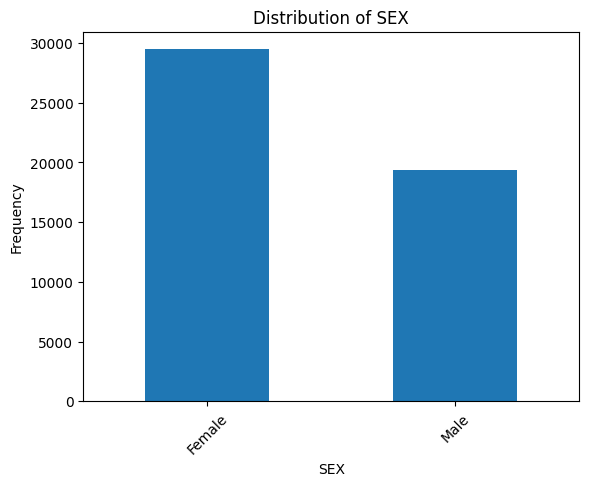

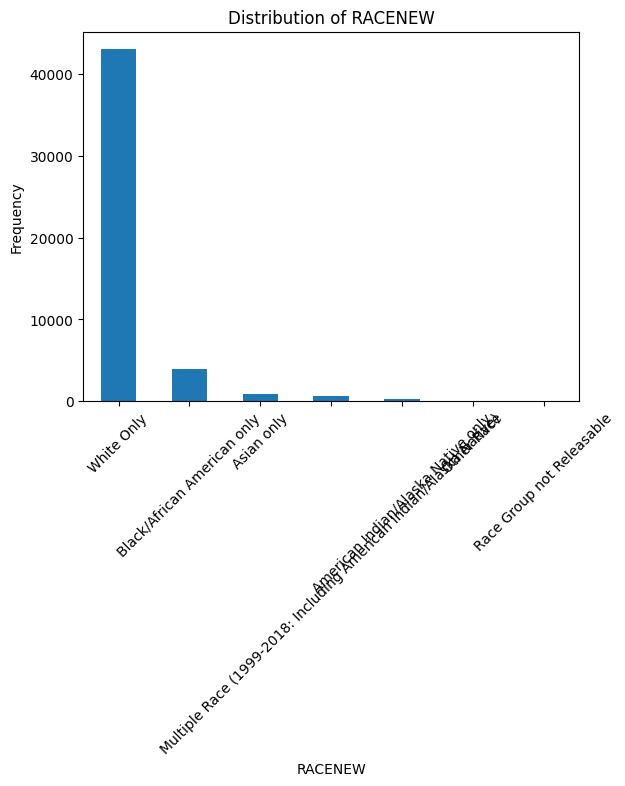

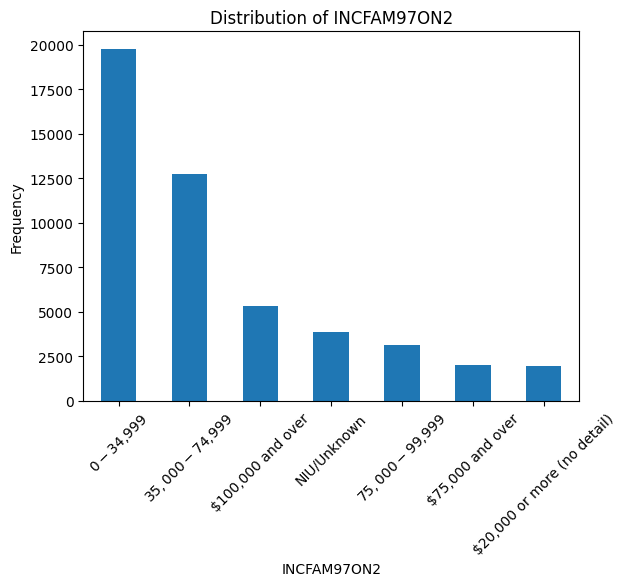

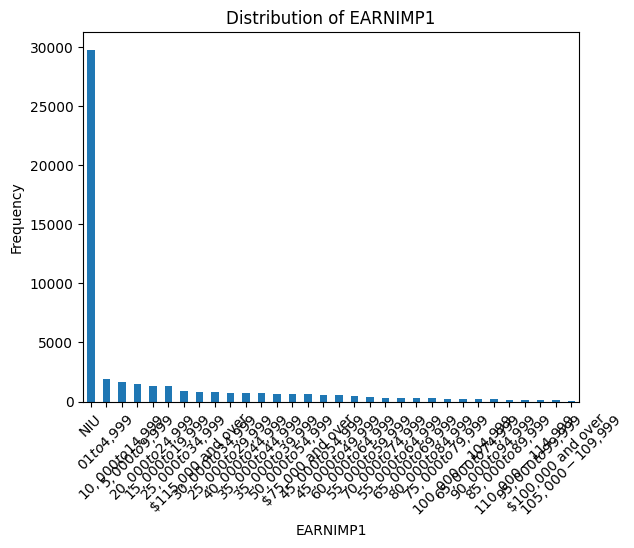

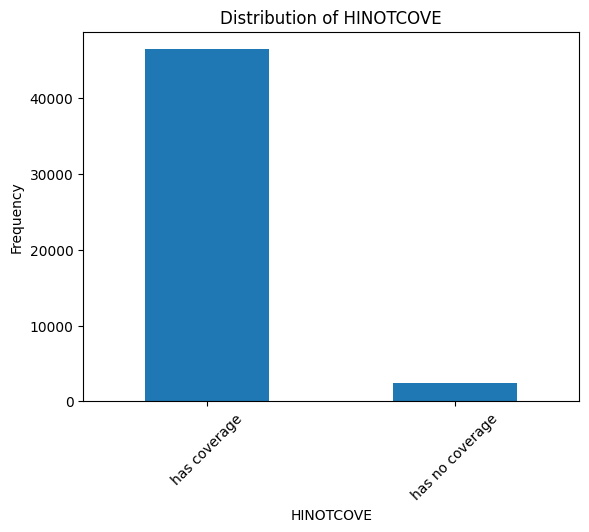

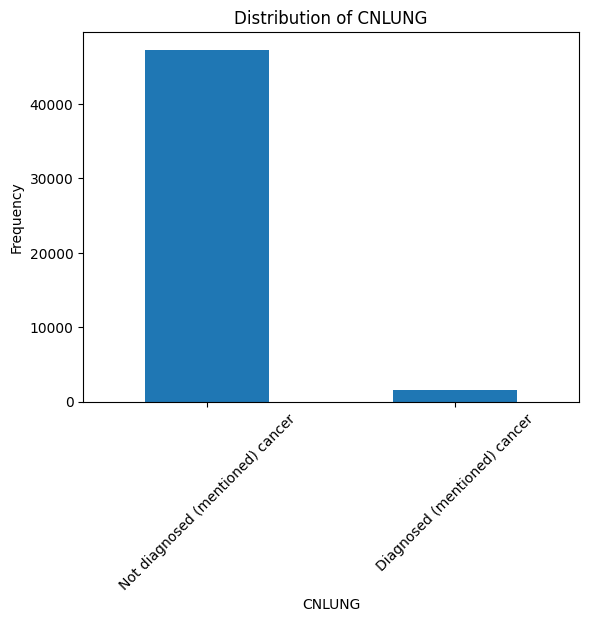

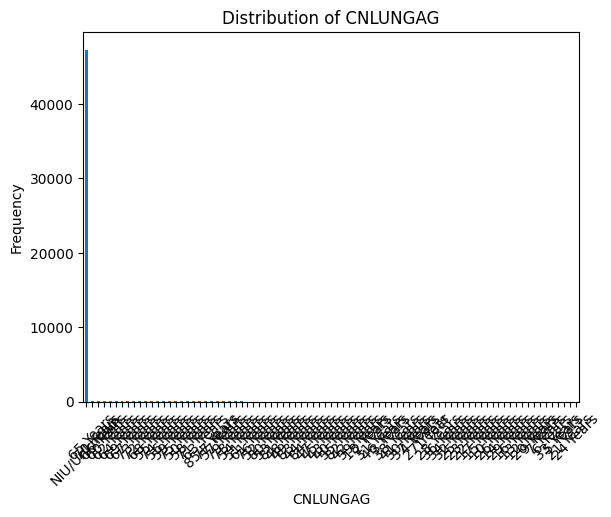

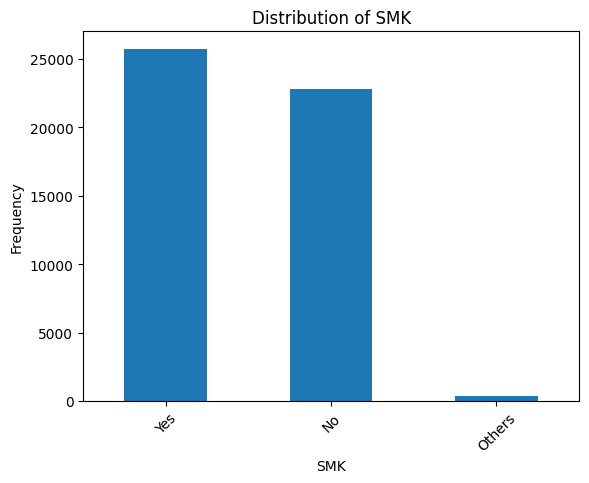

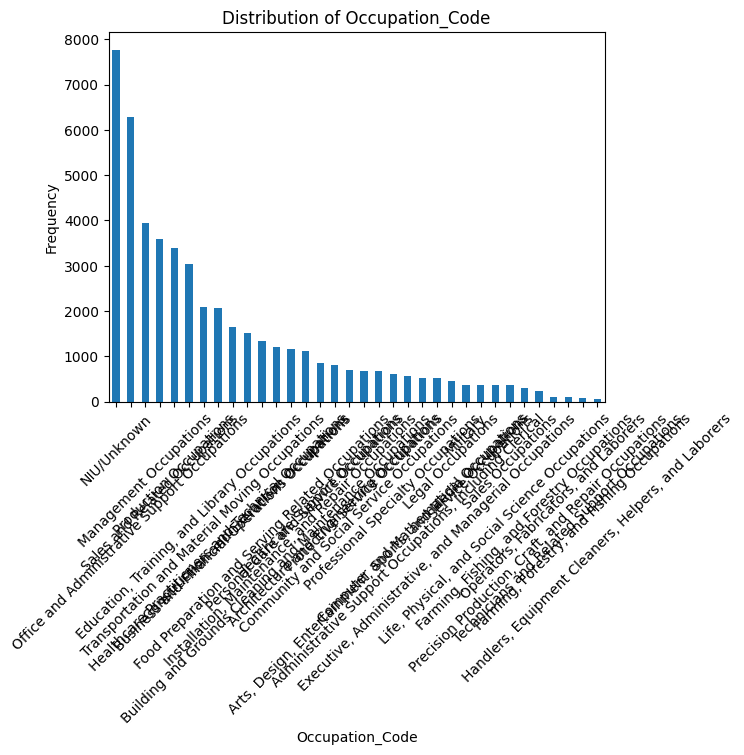

In [769]:
import matplotlib.pyplot as plt

# Define the categorical variables and their corresponding labels
categorical_variables = {
    "SEX": {1: "Male", 2: "Female"},
    "RACENEW": {
        100: "White Only",
        200: "Black/African American only",
        300: "American Indian/Alaska Native only",
        400: "Asian only",
        520: "Other Race",
        530: "Race Group not Releasable",
        541: "Multiple Race (1999-2018: Including American Indian/Alaska Native)",
    },
    "INCFAM97ON2": {
        10.0: "$0 - $34,999",
        20.0: "$35,000-$74,999",
        30.0: "$75,000 and over",
        31.0: "$75,000-$99,999",
        32.0: "$100,000 and over",
        96.0: "$20,000 or more (no detail)",
        0.0: "NIU/Unknown",
    },
    "EARNIMP1": {
        0.0: "NIU",
        1: "$01 to $4,999",
        2: "$5,000 to $9,999",
        3: "$10,000 to $14,999",
        4: "$15,000 to $19,999",
        5: "$20,000 to $24,999",
        10: "$25,000 to $34,999",
        11: "$25,000 to $29,999",
        12: "$30,000 to $34,999",
        20: "$35,000 to $44,999",
        21: "$35,000 to $39,999",
        22: "$40,000 to $44,999",
        30: "$45,000 to $54,999",
        31: "$45,000 to $49,999",
        32: "$50,000 to $54,999",
        40: "$55,000 to $64,999",
        41: "$55,000 to $59,999",
        42: "$60,000 to $64,999",
        50: "$65,000 to $74,999",
        51: "$65,000 to $69,999",
        52: "$70,000 to $74,999",
        60: "$75,000 and over",
        61: "$75,000 to $79,999",
        62: "$80,000 to $84,999",
        63: "$85,000 to $89,999",
        64: "$90,000 to $94,999",
        65: "$95,000 to $99,999",
        66: "$100,000 and over",
        67: "$100,000-$104,999",
        68: "$105,000-$109,999",
        69: "$110,000-$114,999",
        70: "$115,000 and over",
    },
    "HINOTCOVE": {1.0: "has coverage", 2.0: "has no coverage"},
    "CNLUNG": {
        1.0: "Not diagnosed (mentioned) cancer",
        2.0: "Diagnosed (mentioned) cancer",
    },
    "CNLUNGAG": {
        1.0: "1 Year",
        2.0: "2 Years",
        3.0: "3 Years",
        4.0: "4 Years",
        5.0: "5 Years",
        6.0: "6 Years",
        7.0: "7 Years",
        9.0: "9 Years",
        10.0: "10 Years",
        12.0: "12 Years",
        13.0: "13 Years",
        14.0: "14 Years",
        15.0: "15 Years",
        16.0: "16 Years",
        17.0: "17 Years",
        18.0: "18 Years",
        20.0: "20 Years",
        21.0: "21 Years",
        22.0: "22 Years",
        23.0: "23 Years",
        24.0: "24 Years",
        25.0: "25 Years",
        26.0: "26 Years",
        27.0: "27 Years",
        28.0: "28 Years",
        29.0: "29 Years",
        30.0: "30 Years",
        31.0: "31 Years",
        32.0: "32 Years",
        33.0: "33 Years",
        34.0: "34 Years",
        35.0: "35 Years",
        36.0: "36 Years",
        37.0: "37 Years",
        38.0: "38 Years",
        39.0: "39 Years",
        40.0: "40 Years",
        41.0: "41 Years",
        42.0: "42 Years",
        43.0: "43 Years",
        44.0: "44 Years",
        45.0: "45 Years",
        46.0: "46 Years",
        47.0: "47 Years",
        48.0: "48 Years",
        49.0: "49 Years",
        50.0: "50 Years",
        51.0: "51 Years",
        52.0: "52 Years",
        53.0: "53 Years",
        54.0: "54 Years",
        55.0: "55 Years",
        56.0: "56 Years",
        57.0: "57 Years",
        58.0: "58 Years",
        59.0: "59 Years",
        60.0: "60 Years",
        61.0: "61 Years",
        62.0: "62 Years",
        63.0: "63 Years",
        64.0: "64 Years",
        65.0: "65 Years",
        66.0: "66 Years",
        67.0: "67 Years",
        68.0: "68 Years",
        69.0: "69 Years",
        70.0: "70 Years",
        71.0: "71 Years",
        72.0: "72 Years",
        73.0: "73 Years",
        74.0: "74 Years",
        75.0: "75 Years",
        76.0: "76 Years",
        77.0: "77 Years",
        78.0: "78 Years",
        79.0: "79 Years",
        80.0: "80 Years",
        81.0: "81 Years",
        82.0: "82 Years",
        83.0: "83 Years",
        84.0: "84 Years",
        85.0: "85+ Years",
        99.0: "NIU/Unknown",
    },
    "SMK": {1: "Yes", 2: "No", 0: "Others"},
    "Occupation_Code": {
        0: "NIU/Unknown",
        1: "Office and Administrative Support Occupations",
        2: "Management Occupations",
        3: "Sales and Related Occupations",
        4: "Production Occupations",
        5: "Education, Training, and Library Occupations",
        6: "Transportation and Material Moving Occupations",
        7: "Healthcare Practitioners and Technical Occupations",
        8: "Business and Financial Operations Occupations",
        9: "Construction and Extraction Occupations",
        10: "Food Preparation and Serving Related Occupations",
        11: "Building and Grounds Cleaning and Maintenance Occupations",
        12: "Installation, Maintenance, and Repair Occupations",
        13: "Personal Care and Service Occupations",
        14: "Healthcare Support Occupations",
        15: "Architecture and Engineering Occupations",
        16: "Community and Social Service Occupations",
        17: "Protective Service Occupations",
        18: "Arts, Design, Entertainment, Sports, and Media Occupations",
        19: "Professional Specialty Occupations",
        20: "Administrative Support Occupations, Including Clerical",
        21: "Computer and Mathematical Occupations",
        22: "Executive, Administrative, and Managerial Occupations",
        23: "Legal Occupations",
        24: "Military",
        25: "Service Occupations",
        26: "Life, Physical, and Social Science Occupations",
        27: "Sales Occupations",
        28: "Farming, Fishing, and Forestry Occupations",
        29: "Precision Production, Craft, and Repair Occupations",
        30: "Operators, Fabricators, and Laborers",
        31: "Technicians and Related Support Occupations",
        32: "Farming, Forestry, and Fishing Occupations",
        33: "Handlers, Equipment Cleaners, Helpers, and Laborers",
    },
}

# Plot the distribution of each categorical variable
for variable, labels in categorical_variables.items():
    # Count the occurrences of each category
    counts = insurance[variable].map(labels).value_counts()

    # Plot the bar chart
    counts.plot(kind="bar", rot=45)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {variable}")
    plt.show()

> Since the CNLUNGAG variable has too many NIU/Unkown values, I prefer dropping the entire varaible to not be included in the regression analysis 

In [770]:
# Drop the 'CLUNGAG' variable
insurance = insurance.drop(columns=["CNLUNGAG"])

In [771]:
insurance.shape

(48854, 9)

> Drop the year variable 

In [772]:
# Drop the 'YEAR' variable
insurance = insurance.drop(columns=["YEAR"])

In [773]:
insurance.head()

,SEX,RACENEW,INCFAM97ON2,EARNIMP1,HINOTCOVE,CNLUNG,SMK,Occupation_Code
75,2,100.0,0.0,0.0,1.0,1.0,2,0
562,2,200.0,20.0,10.0,2.0,1.0,2,19
644,2,100.0,20.0,0.0,1.0,1.0,1,0
661,2,100.0,96.0,40.0,1.0,1.0,1,19
678,1,100.0,96.0,50.0,1.0,1.0,2,27


In [787]:
insurance

,SEX,RACENEW,INCFAM97ON2,EARNIMP1,HINOTCOVE,CNLUNG,SMK,Occupation_Code
75,2,100,0,0,1,1,2,0
562,2,200,20,10,0,1,2,19
644,2,100,20,0,1,1,1,0
661,2,100,96,40,1,1,1,19
678,1,100,96,50,1,1,2,27
...,...,...,...,...,...,...,...,...
1762592,2,100,20,0,1,1,2,1
1762623,1,100,31,0,1,1,1,26
1762626,1,100,10,0,1,1,1,9
1762630,2,100,32,22,1,1,1,5


## Matching

In [774]:
# Check for missing values in each column
missing_values = insurance.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
SEX                0
RACENEW            0
INCFAM97ON2        0
EARNIMP1           0
HINOTCOVE          0
CNLUNG             0
SMK                0
Occupation_Code    0
dtype: int64


In [775]:
# Display the data types of each column in the DataFrame
print("Data types of each variable in the DataFrame:")
print(insurance.dtypes)

Data types of each variable in the DataFrame:
SEX                category
RACENEW            category
INCFAM97ON2        category
EARNIMP1           category
HINOTCOVE          category
CNLUNG             category
SMK                category
Occupation_Code    category
dtype: object


In [776]:
# Convert all columns to integer type
insurance = insurance.astype(int)

In [777]:
# Display the data types of each column in the DataFrame
print("Data types of each variable in the DataFrame:")
print(insurance.dtypes)

Data types of each variable in the DataFrame:
SEX                int64
RACENEW            int64
INCFAM97ON2        int64
EARNIMP1           int64
HINOTCOVE          int64
CNLUNG             int64
SMK                int64
Occupation_Code    int64
dtype: object


In [778]:
# Check unique values in the "HINOTCOVE" column
unique_values = insurance["HINOTCOVE"].unique()
print(unique_values)

[1 2]


> Deflame only accept binary treament varibale either 0 or 1, so we recode it. 1 is has insurance coverage, 0 is no insurance coverage 

In [779]:
# Map 1 to 1 and 2 to 0 in the "HINOTCOVE" column
insurance["HINOTCOVE"] = insurance["HINOTCOVE"].map({1: 1, 2: 0})

# Check unique values in the "HINOTCOVE" column after mapping
unique_values = insurance["HINOTCOVE"].unique()
print(unique_values)

[1 0]


### Check covaraince between INCFAM97ON2 and EARNIMP1

In [780]:
from scipy.stats import chi2_contingency


def cramers_v(confusion_matrix):
    """
    Calculates Cramer's V statistic for categorical-categorical association.

    Parameters:
    - confusion_matrix: Contingency table (2D array) of categorical variables.

    Returns:
    - Cramer's V statistic.
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k - 1) * (r - 1) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def theils_u(x, y):
    """
    Calculates Theil's U statistic for categorical-categorical association.

    Parameters:
    - x: Series representing the first categorical variable.
    - y: Series representing the second categorical variable.

    Returns:
    - Theil's U statistic.
    """

    def conditional_entropy(x, y):
        entropy = 0.0
        unique_values = np.unique(x)
        for val in unique_values:
            p_xy = len(x[x == val]) / len(x)
            cond_entropy = 0.0
            y_given_x = y[x == val]
            unique_values_y = np.unique(y_given_x)
            for val_y in unique_values_y:
                p_y_given_x = len(y_given_x[y_given_x == val_y]) / len(y_given_x)
                cond_entropy += p_y_given_x * np.log(p_y_given_x + np.finfo(float).eps)
            entropy += p_xy * cond_entropy
        return entropy

    entropy_x = conditional_entropy(x, y)
    entropy_y = conditional_entropy(y, x)
    mutual_information = entropy_x + entropy_y - conditional_entropy(x, y)
    u = mutual_information / max(entropy_x, entropy_y)
    return u


# Example usage
# Assuming df is your DataFrame containing the categorical variables
confusion_matrix = pd.crosstab(insurance["INCFAM97ON2"], insurance["EARNIMP1"]).values
cramers_v_statistic = cramers_v(confusion_matrix)
theils_u_statistic = theils_u(insurance["INCFAM97ON2"], insurance["EARNIMP1"])

print("Cramer's V statistic:", cramers_v_statistic)
print("Theil's U statistic:", theils_u_statistic)

Cramer's V statistic: 0.352344176431472
Theil's U statistic: 0.9999999999999999


1. **Cramer's V Statistic (0.352344176431472)**:
   - Cramer's V ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.
   - In this case, a value of 0.35 suggests a moderate association between the two categorical variables.
   - A higher value indicates a stronger association, so 0.35 signifies a moderate strength of association.

2. **Theil's U Statistic (0.9999999999999999)**:
   - Theil's U ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.
   - A value of 1 indicates that one variable fully explains the other, while a value close to 0 indicates minimal association.
   - Here, the value being very close to 1 suggests that one variable (or a combination of variables) explains the other almost entirely.
   - It's worth noting that Theil's U is asymmetric, meaning it measures the association between two variables but does not distinguish between predictor and response variables.

In summary, based on these statistics, there seems to be a moderate association between the two categorical variables, with Theil's U indicating that one variable might explain the other quite well.

**We may need to choose one varaible between these two, but for the following matching and regression I will include both**

In [781]:
import dame_flame

model = dame_flame.matching.DAME(
    repeats=False,
    verbose=3,
    want_pe=True,
    stop_unmatched_t=True,
)
model.fit(
    insurance,
    treatment_column_name="HINOTCOVE",
    outcome_column_name="CNLUNG",
)
result = model.predict(insurance)

Completed iteration 0 of matching
	Number of matched groups formed in total:  1000
	Unmatched treated units:  23119 out of a total of  46431 treated units
	Unmatched control units:  369 out of a total of  2423 control units
	Number of matches made this iteration:  25366
	Number of matches made so far:  25366
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  0.05189170770308218
Completed iteration 1 of matching
	Number of matched groups formed in total:  1127
	Unmatched treated units:  22420 out of a total of  46431 treated units
	Unmatched control units:  228 out of a total of  2423 control units
	Number of matches made this iteration:  840
	Number of matches made so far:  26206
	Covariates dropped so far:  frozenset({'RACENEW'})
	Predictive error of covariate set used to match:  0.05189845249869203
Completed iteration 2 of matching
	Number of matched groups formed in total:  1233
	Unmatched treated units:  22053 out of a total of  46431 treated unit

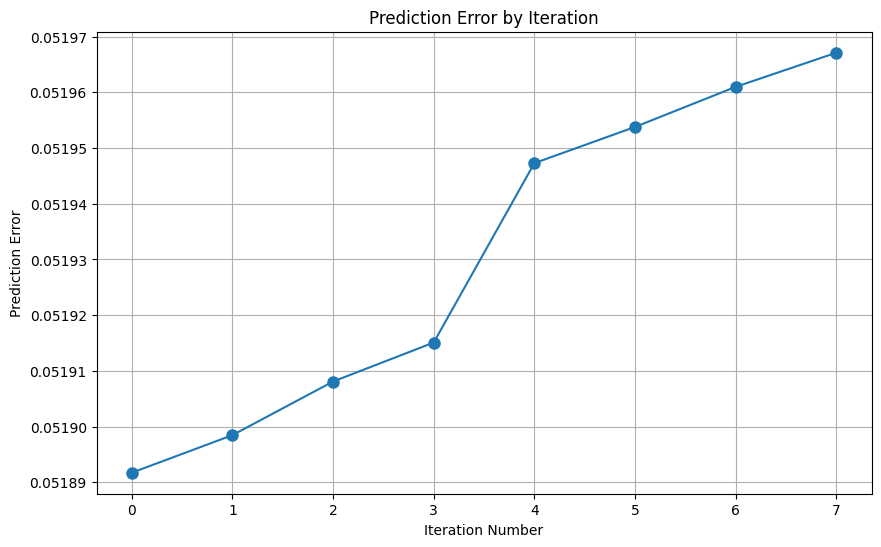

In [782]:
# Retrieve the prediction errors for each iteration
prediction_errors = model.pe_each_iter

# Plotting the prediction errors
plt.figure(figsize=(10, 6))
plt.plot(prediction_errors, marker="o", linestyle="-", markersize=8)
plt.title("Prediction Error by Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Prediction Error")
plt.grid(True)
plt.show()

> I choose my stopping point at iteration number 3

In [783]:
model_new = dame_flame.matching.DAME(
    repeats=False,
    verbose=3,
    want_pe=True,
    stop_unmatched_t=True,
    early_stop_iterations=3,  # Stop after iteration 3
)
model_new.fit(
    insurance,
    treatment_column_name="HINOTCOVE",
    outcome_column_name="CNLUNG",
)
result_new = model_new.predict(insurance)

Completed iteration 0 of matching
	Number of matched groups formed in total:  1000
	Unmatched treated units:  23119 out of a total of  46431 treated units
	Unmatched control units:  369 out of a total of  2423 control units
	Number of matches made this iteration:  25366
	Number of matches made so far:  25366
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  0.05189170770308218
Completed iteration 1 of matching
	Number of matched groups formed in total:  1127
	Unmatched treated units:  22420 out of a total of  46431 treated units
	Unmatched control units:  228 out of a total of  2423 control units
	Number of matches made this iteration:  840
	Number of matches made so far:  26206
	Covariates dropped so far:  frozenset({'RACENEW'})
	Predictive error of covariate set used to match:  0.05189845249869203
Completed iteration 2 of matching
	Number of matched groups formed in total:  1233
	Unmatched treated units:  22053 out of a total of  46431 treated unit

In [784]:
def get_dataframe(model, result_of_fit):

    # Get original data
    better = model.input_data.loc[result_of_fit.index]
    if not better.index.is_unique:
        raise ValueError("Need index values in input data to be unique")

    # Get match groups for clustering
    better["match_group"] = np.nan
    better["match_group_size"] = np.nan
    for idx, group in enumerate(model.units_per_group):
        better.loc[group, "match_group"] = idx
        better.loc[group, "match_group_size"] = len(group)

    # Get weights. I THINK this is right?! At least for with repeat=False?
    t = model.treatment_column_name
    better["t_in_group"] = better.groupby("match_group")[t].transform(np.sum)

    # Make weights
    better["weights"] = np.nan
    better.loc[better[t] == 1, "weights"] = 1  # treaments are 1

    # Controls start as proportional to num of treatments
    # each observation is matched to.
    better.loc[better[t] == 0, "weights"] = better["t_in_group"] / (
        better["match_group_size"] - better["t_in_group"]
    )

    # Then re-normalize for num unique control observations.
    control_weights = better[better[t] == 0]["weights"].sum()

    num_control_obs = len(better[better[t] == 0].index.drop_duplicates())
    renormalization = num_control_obs / control_weights
    better.loc[better[t] == 0, "weights"] = (
        better.loc[better[t] == 0, "weights"] * renormalization
    )
    assert better.weights.notnull().all()

    better = better.drop(["t_in_group"], axis="columns")

    # Make sure right length and values!
    assert len(result_of_fit) == len(better)
    assert better.loc[better[t] == 0, "weights"].sum() == num_control_obs

    return better

In [785]:
matched_data = get_dataframe(model_new, result_new)
matched_data.head()

,SEX,RACENEW,INCFAM97ON2,EARNIMP1,HINOTCOVE,CNLUNG,SMK,Occupation_Code,match_group,match_group_size,weights
75,2,100,0,0,1,1,2,0,3.0,278.0,1.000000
562,2,200,20,10,0,1,2,19,1228.0,2.0,0.096159
644,2,100,20,0,1,1,1,0,415.0,244.0,1.000000
707,1,100,20,30,1,1,1,0,659.0,7.0,1.000000
814,1,100,10,0,1,1,1,0,52.0,760.0,1.000000


In [786]:
matched_data.shape

(26937, 11)

## Check matches and analysis (Regression)

In [788]:
print(f"Checking the Columns in matched data:")
matched_data.columns

Checking the Columns in matched data:


Index(['SEX', 'RACENEW', 'INCFAM97ON2', 'EARNIMP1', 'HINOTCOVE', 'CNLUNG',
       'SMK', 'Occupation_Code', 'match_group', 'match_group_size', 'weights'],
      dtype='object')

In [789]:
# Model with controls except County
model_with_controls = smf.wls(
    "CNLUNG ~ HINOTCOVE + C(SEX) + C(RACENEW) + C(INCFAM97ON2) + C(EARNIMP1) + C(SMK) + C(Occupation_Code)",
    data=matched_data,
    weights=matched_data["weights"],
).fit()

In [790]:
model_with_controls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 CNLUNG   R-squared:                       0.020
Model:                            WLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.187
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           2.84e-72
Time:                        13:56:07   Log-Likelihood:                 5629.6
No. Observations:               26937   AIC:                        -1.110e+04
Df Residuals:                   26859   BIC:                        -1.046e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.9995      0.105      9.547      0.000       0.794       1.205
C(SEX)[T.2]                 -0.0047      0.003     -1.548      0.122      -0.011       0.001
C(RACENEW)[T.200]            0.0197      0.005      3.971      0.000       0.010       0.029
C(RACENEW)[T.300]            0.0330      0.024      1.354      0.176      -0.015       0.081
C(RACENEW)[T.400]            0.0124      0.016      0.780      0.435      -0.019       0.044
C(RACENEW)[T.520]           -0.0025      0.030     -0.084      0.933      -0.061       0.056
C(RACENEW)[T.530]           -0.0227      0.066     -0.344      0.731      -0.152       0.107
C(RACENEW)[T.541]            0.0143      0.020      0.728      0.466      -0.024       0.053
C(INCFAM97ON2)[T.10]         0.0002      0.005      0.043      0.965      -0.009       0.010
C(INCFAM97ON2)[T.20]        -0.0041      0.005     -0.780      0.436      -0.014       0.006
C(INCFAM97ON2)[T.30]         0.0008      0.011      0.075      0.941      -0.021       0.023
C(INCFAM97ON2)[T.31]        -0.0062      0.010     -0.599      0.549      -0.027       0.014
C(INCFAM97ON2)[T.32]        -0.0122      0.010     -1.259      0.208      -0.031       0.007
C(INCFAM97ON2)[T.96]        -0.0041      0.010     -0.410      0.682      -0.024       0.016
C(EARNIMP1)[T.1]            -0.0260      0.007     -3.852      0.000      -0.039      -0.013
C(EARNIMP1)[T.2]            -0.0225      0.008     -2.923      0.003      -0.038      -0.007
C(EARNIMP1)[T.3]            -0.0125      0.007     -1.782      0.075      -0.026       0.001
C(EARNIMP1)[T.4]            -0.0226      0.008     -2.744      0.006      -0.039      -0.006
C(EARNIMP1)[T.5]            -0.0211      0.008     -2.520      0.012      -0.037      -0.005
C(EARNIMP1)[T.10]           -0.0192      0.012     -1.553      0.120      -0.044       0.005
C(EARNIMP1)[T.11]           -0.0250      0.012     -2.127      0.033      -0.048      -0.002
C(EARNIMP1)[T.12]           -0.0312      0.013     -2.354      0.019      -0.057      -0.005
C(EARNIMP1)[T.20]           -0.0223      0.016     -1.402      0.161      -0.054       0.009
C(EARNIMP1)[T.21]           -0.0352      0.014     -2.578      0.010      -0.062      -0.008
C(EARNIMP1)[T.22]           -0.0129      0.012     -1.055      0.292      -0.037       0.011
C(EARNIMP1)[T.30]           -0.0066      0.019     -0.350      0.726      -0.043       0.030
C(EARNIMP1)[T.31]           -0.0254      0.021     -1.193      0.233      -0.067       0.016
C(EARNIMP1)[T.32]           -0.0326      0.019     -1.756      0.079      -0.069       0.004
C(EARNIMP1)[T.40]           -0.0359      0.041     -0.874      0.382      -0.116       0.045
C(EARNIMP1)[T.41]           -0.0472      0.043     -1.100      0.271      -0.131       0.037
C(EARNIMP1)[T.

In [792]:
# To get the coefficient for the 'HINOTCOVE' variable
insurance_coefficient_control = model_with_controls.params["HINOTCOVE"]
print(f"Coefficient for 'HINOTCOVE' with controls: {insurance_coefficient_control:.4f}")

Coefficient for 'HINOTCOVE' with controls: 0.0125


In [793]:
# To get the p-value for the coefficient of 'HINOTCOVE' variable
insurance_p_value_control = model_with_controls.pvalues["HINOTCOVE"]
print(f"P-value for 'HINOTCOVE' with controls: {insurance_p_value_control:.4f}")

P-value for 'HINOTCOVE' with controls: 0.0023
